### Loading data

In [1]:
import time 
import sys
import xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [2]:
X = pd.read_csv('data/train/vgg_train_features.csv', header=None, index_col=0)
y = np.array([0 if x.startswith('cat') else 1 for x in X.index])
X_test = pd.read_csv('data/test/vgg_test_features.csv', header=None, index_col=0)

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=3000)
print(X_train.shape, y_train.shape)
X_train.head()

((22000, 4096), (22000,))


,1,2,3,4,5,6,7,8,9,10,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,,,,,,,,,,,,,,,,,,,,,
dog.1619.jpg,0.000000,2.973565,5.215432,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.944644,0.000000,2.926491,0.0,0.000000
dog.9505.jpg,0.604877,0.000000,2.768252,0.966774,0.0,0.000000,6.409990,0.0,0.000000,0.000000,...,0.0,2.104954,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
cat.9425.jpg,0.000000,0.000000,0.000000,0.000000,0.0,1.233131,0.296057,0.0,0.000000,1.609659,...,0.0,0.000000,0.0,0.0,0.880284,1.727552,0.000000,0.000000,0.0,2.213197
cat.4447.jpg,0.000000,0.000000,0.000000,7.242090,0.0,0.000000,0.000000,0.0,0.039648,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,5.208019,2.630467,0.000000,0.0,1.954571
cat.762.jpg,0.000000,0.000000,2.309701,3.420354,0.0,0.000000,2.157184,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.259615,0.000000,0.000000,0.000000,0.0,1.783026


-----

### Random Forest

In [4]:
# finetuned
clf = RandomForestClassifier(
    n_estimators=190,
    max_depth=None,
    warm_start=True,
    n_jobs=4, verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 190 out of 190 | elapsed:  1.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=190, n_jobs=4, oob_score=False, random_state=None,
            verbose=1, warm_start=True)

In [5]:
y_pred = clf.predict(X_val)

print('Accuracy:\t%.4f' % accuracy_score(y_val, y_pred))
print('Precition:\t%.4f' % precision_score(y_val, y_pred))
print('Recall:\t\t%.4f' % recall_score(y_val, y_pred))
print('F1-score:\t%.4f' % f1_score(y_val, y_pred))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


Accuracy:	0.9693
Precition:	0.9657
Recall:		0.9734
F1-score:	0.9696


[Parallel(n_jobs=4)]: Done 190 out of 190 | elapsed:    0.3s finished


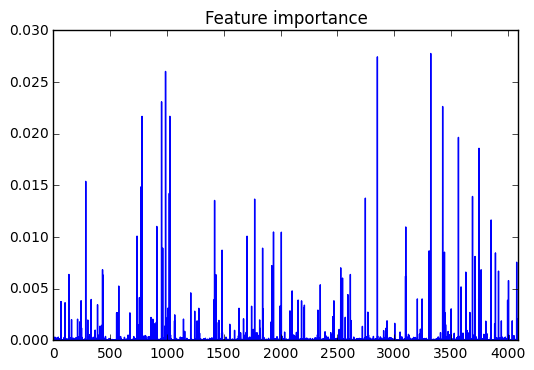

In [6]:
plt.plot(clf.feature_importances_)
plt.xlim((0, X.shape[1]))
plt.title('Feature importance');

In [ ]:
y_pred = pd.DataFrame(clf.predict(X_test), columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == 0] = 'cat'
y_pred[y_pred['label'] == 1] = 'dog'
y_pred.to_csv('vgg_rf.csv', index_label='file')

-----

### SGD

In [7]:
# finetuned
clf = SGDClassifier(loss='hinge', penalty='l2', epsilon=1., alpha=0.65,  n_jobs=4)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.65, average=False, class_weight=None, epsilon=1.0,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=4,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [8]:
y_pred = clf.predict(X_val)

print('Accuracy:\t%.4f' % accuracy_score(y_val, y_pred))
print('Precition:\t%.4f' % precision_score(y_val, y_pred))
print('Recall:\t\t%.4f' % recall_score(y_val, y_pred))
print('F1-score:\t%.4f' % f1_score(y_val, y_pred))

Accuracy:	0.9763
Precition:	0.9767
Recall:		0.9761
F1-score:	0.9764


In [21]:
y_pred = pd.DataFrame(clf.predict(X_test), columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == 0] = 'cat'
y_pred[y_pred['label'] == 1] = 'dog'
y_pred.to_csv('vgg_sgd.csv', index_label='file')

-----

### Neural Network

In [9]:
import lasagne
import theano
import theano.tensor as T

from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import NonlinearityLayer
from lasagne.layers import BatchNormLayer
from lasagne.layers import DropoutLayer
from lasagne.nonlinearities import softmax, sigmoid

# finetuned
def build_model():
    net = {}
    net['input'] = InputLayer((None, 4096))
    net['fc1'] = DenseLayer(net['input'], num_units=512, nonlinearity=None)
    net['bn1'] = BatchNormLayer(net['fc1'])
    net['nl1'] = NonlinearityLayer(net['bn1'], sigmoid)
    net['fc1_dropout'] = DropoutLayer(net['nl1'], p=0.5)
    net['fc2'] = DenseLayer(net['fc1_dropout'], num_units=64, nonlinearity=None)
    net['bn2'] = BatchNormLayer(net['fc2'])
    net['nl2'] = NonlinearityLayer(net['bn2'], sigmoid)
    net['fc2_dropout'] = DropoutLayer(net['nl2'], p=0.5)
    net['fc3'] = DenseLayer(net['fc2_dropout'], num_units=2, nonlinearity=None)
    net['prob'] = NonlinearityLayer(net['fc3'], softmax)

    return net

# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X.loc[X.index[batch_idx]], Y[batch_idx]

In [10]:
input_var = T.matrix('inputs')
target_var = T.ivector('targets')
learning_rate = T.scalar(name='learning_rate')

net = build_model()

prediction = lasagne.layers.get_output(net['prob'], input_var)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var).mean()

params = lasagne.layers.get_all_params(net['prob'], trainable=True)
updates = lasagne.updates.adam(loss, params, learning_rate=learning_rate)

In [11]:
test_prediction = lasagne.layers.get_output(net['prob'], input_var, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction, target_var).mean()

test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),dtype=theano.config.floatX)

In [12]:
train_fn = theano.function([input_var, target_var, learning_rate], loss, updates=updates, allow_input_downcast=True)
val_fn = theano.function([input_var, target_var], [test_loss, test_acc], allow_input_downcast=True)
predict = theano.function([input_var], test_prediction, allow_input_downcast=True)

In [13]:
num_epochs = 70
lr = 1e-4
for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_batches = 0
    start_time = time.time()
    for batch in get_batches((X_train, y_train), 1000):
        inputs, targets = batch
        train_err += train_fn(inputs, targets, lr)
        train_batches += 1
        sys.stdout.flush()
    
    # And a full pass over the validation data:
    val_err = 0
    val_acc = 0
    val_batches = 0
    for batch in get_batches((X_val, y_val), 500):
        inputs, targets = batch
        err, acc = val_fn(inputs, targets)
        val_err += err
        val_acc += acc
        val_batches += 1

#     # Then we print the results for this epoch:
#     if epoch % 5 == 0: 
    print("\nEpoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))
    print("  loss:\t\t\t{:.6f},{:.6f}".format(train_err / train_batches, val_err / val_batches))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))
    sys.stdout.flush()


Epoch 1 of 70 took 14.650s
  loss:			0.495189,0.213263
  validation accuracy:		95.23 %

Epoch 2 of 70 took 14.249s
  loss:			0.323056,0.189897
  validation accuracy:		96.23 %

Epoch 3 of 70 took 16.048s
  loss:			0.275076,0.175937
  validation accuracy:		96.87 %

Epoch 4 of 70 took 17.490s
  loss:			0.251369,0.165233
  validation accuracy:		96.97 %

Epoch 5 of 70 took 17.074s
  loss:			0.235663,0.156210
  validation accuracy:		97.30 %

Epoch 6 of 70 took 13.535s
  loss:			0.220313,0.149320
  validation accuracy:		97.23 %

Epoch 7 of 70 took 16.510s
  loss:			0.211799,0.143165
  validation accuracy:		97.27 %

Epoch 8 of 70 took 15.509s
  loss:			0.204222,0.138039
  validation accuracy:		97.37 %

Epoch 9 of 70 took 15.334s
  loss:			0.194345,0.133163
  validation accuracy:		97.30 %

Epoch 10 of 70 took 13.025s
  loss:			0.188562,0.128811
  validation accuracy:		97.37 %

Epoch 11 of 70 took 15.015s
  loss:			0.184346,0.124692
  validation accuracy:		97.40 %

Epoch 12 of 70 took 13.635s
 

In [14]:
y_true, y_pred = [], []
for batch in get_batches((X_train, y_train), 500):
    inputs, targets = batch
    y_pred.extend((predict(inputs)[:,1] > 0.5).astype(int))
    y_true.extend(targets)
print('Train: %.4f %.4f %.4f %.4f' %\
      (accuracy_score(y_true, y_pred),\
       precision_score(y_true, y_pred),\
       recall_score(y_true, y_pred),\
       f1_score(y_true, y_pred)))

y_true, y_pred = [], []
for batch in get_batches((X_val, y_val), 500):
    inputs, targets = batch
    y_pred.extend((predict(inputs)[:,1] > 0.5).astype(int))
    y_true.extend(targets)
    
print('Valid: %.4f %.4f %.4f %.4f' %\
      (accuracy_score(y_true, y_pred),\
       precision_score(y_true, y_pred),\
       recall_score(y_true, y_pred),\
       f1_score(y_true, y_pred)))

Train: 0.9950 0.9956 0.9943 0.9949
Valid: 0.9770 0.9838 0.9701 0.9769


In [ ]:
y_pred = pd.DataFrame(predict(X_test)[:,1] > 0.5, columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == False] = 'cat'
y_pred[y_pred['label'] == True] = 'dog'
y_pred.to_csv('vgg_nn.csv', index_label='file')

-----

### XGBoost

In [15]:
# finetuned
clf = xgboost.XGBClassifier(
        max_depth=5, 
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree = 0.5,
        n_estimators=200,
        objective='binary:logistic', nthread=4)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bytree=0.5, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, n_estimators=200, nthread=4,
       objective='binary:logistic', seed=0, silent=True, subsample=0.8)

In [16]:
y_pred = clf.predict(X_val)

print('Accuracy:\t%.4f' % accuracy_score(y_val, y_pred))
print('Precition:\t%.4f' % precision_score(y_val, y_pred))
print('Recall:\t\t%.4f' % recall_score(y_val, y_pred))
print('F1-score:\t%.4f' % f1_score(y_val, y_pred))

Accuracy:	0.9763
Precition:	0.9793
Recall:		0.9734
F1-score:	0.9764


In [11]:
y_pred = pd.DataFrame(clf.predict(X_test), columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == 0] = 'cat'
y_pred[y_pred['label'] == 1] = 'dog'
y_pred.to_csv('vgg_xgbst.csv', index_label='file')